# Automatic Differentiation
* To understand how automatic differentiation works under the hood, its instructive too use a compuation whose derivative is non-trivial. 
* In the example below we use the _babylonian algorithm_, which iteratively approximates $\sqrt x$ with increasing precision.
* The advantage of the example is that the derivative of is known, namely $ \frac{d \sqrt x}{dx} = \frac{1}{2\sqrt x}$

In [1]:
function babylonian_sqrt(x, steps=3)
    r = x / 2  # root
    for _ in 1:steps
        r = (r + x / r) / 2
    end
    r
end

babylonian_sqrt (generic function with 2 methods)

In [2]:
xs = 0.1:0.1:10
ys_babylonian = [babylonian_sqrt(x) for x in xs];
ys_exact = [sqrt(x) for x in xs];

In the plot below we see that the algorithm approximates $\sqrt x$ very well in only 3 iterations.

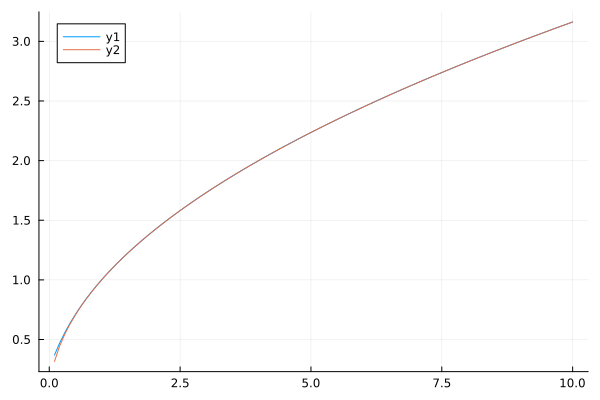

In [3]:
using Plots

plot(xs, ys_babylonian)
plot!(xs, ys_exact)

# Taking Derivatives Analytically

In [4]:
derivative(x) = 1 / (2 * sqrt(x));

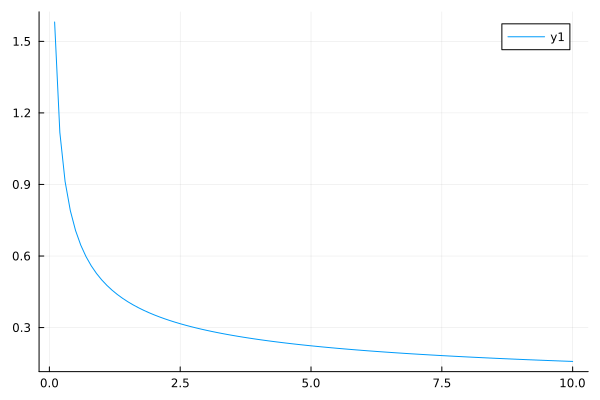

In [5]:
plot(xs, [derivative(x) for x in xs])

# Taking Derivatives With Dual Numbers
* Imagine we did not know the derivative of the _babylonian algorithm_ analytically. We could still compute it with automatic differentiation, and its **dual numbers** representation.
* It requires pairs (x, x') representing a value and its derivative

In [6]:
struct D <: Number  # D is a function-derivative pair
     x::Float64
    x′::Float64
end

In [7]:
import Base: +, /, convert, promote_rule

In [8]:
+(a::D, b::D) = D(a.x + b.x, a.x′ + b.x′);
/(f::D, g::D) = D(f.x / g.x, (f.x′*g.x - f.x*g.x′) / (g.x)^2);

convert(::Type{D}, x::Real) = D(x, zero(x));
promote_rule(::Type{D}, ::Type{<:Number}) = D;

We see that the derivative result is equal;

In [9]:
derivative(2.5), babylonian_sqrt(D(2.5, 1)).x′

(0.31622776601683794, 0.3162270409461595)

# Comparison

In [10]:
exact_derivatives = [derivative(x) for x in xs];
ad_derivatives = [babylonian_sqrt(D(x, 1)).x′ for x in xs];

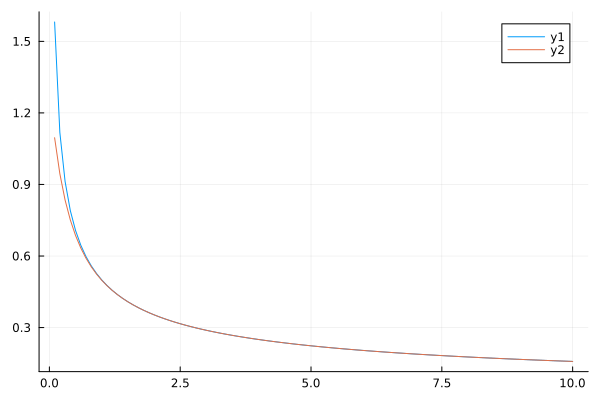

In [11]:
plot(xs, exact_derivatives)
plot!(xs, ad_derivatives)